In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
print("Imported")


%matplotlib inline 

Imported


In [2]:
df  = pd.read_csv("C:\\Bhavani Career\\Bhavani DataScientist\\ML\\05. Linear Regression - 3-20210717T155108Z-001\\05. Linear Regression - 3\\bike_share.csv")
print("Data Read")

Data Read


In [3]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
#prediction

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 935.6 KB


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:

model = LinearRegression()

In [12]:
model.fit(df[['season','holiday','workingday','weather','temp','humidity','windspeed']],df['count'])

LinearRegression()

In [13]:
model.coef_

array([ 22.88354644, -11.26686008,  -1.69422909,   5.40264226,
         7.85915553,  -3.02864616,   0.55713173])

In [14]:
model.intercept_

149.51964593234493

In [16]:
model_pred_count = model.predict(df[['season','holiday','workingday','weather','temp','humidity','windspeed']])

In [17]:
actual_count = df['count']

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [19]:
mean_absolute_error(actual_count,model_pred_count)

117.01265874862034

In [20]:

SSE = mean_squared_error(actual_count,model_pred_count)

In [21]:
import numpy as np
SSR = np.sqrt(mean_squared_error(actual_count, model_pred_count)) #RMSE

In [22]:
# SST 
SST = SSR + SSE

In [23]:
SSR/SST

0.0063694195985309395

In [24]:
import matplotlib.pyplot as plt

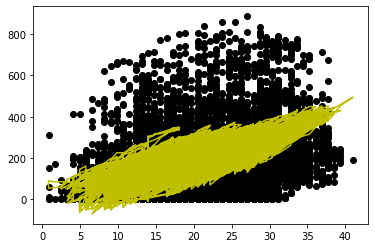

In [25]:

plt.scatter(df[['temp']],df[['registered']], color='black')
plt.plot(df[['temp']],model_pred_count,color='y')
plt.show()

C:\Users\Bhavani\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


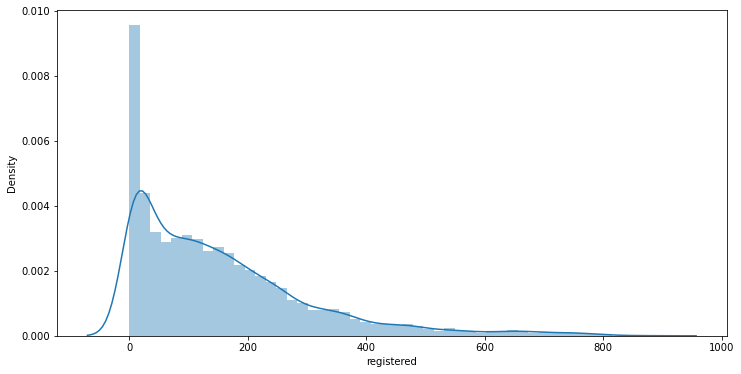

In [26]:
plt.figure(figsize=(12,6))
g = sns.distplot(df["registered"])

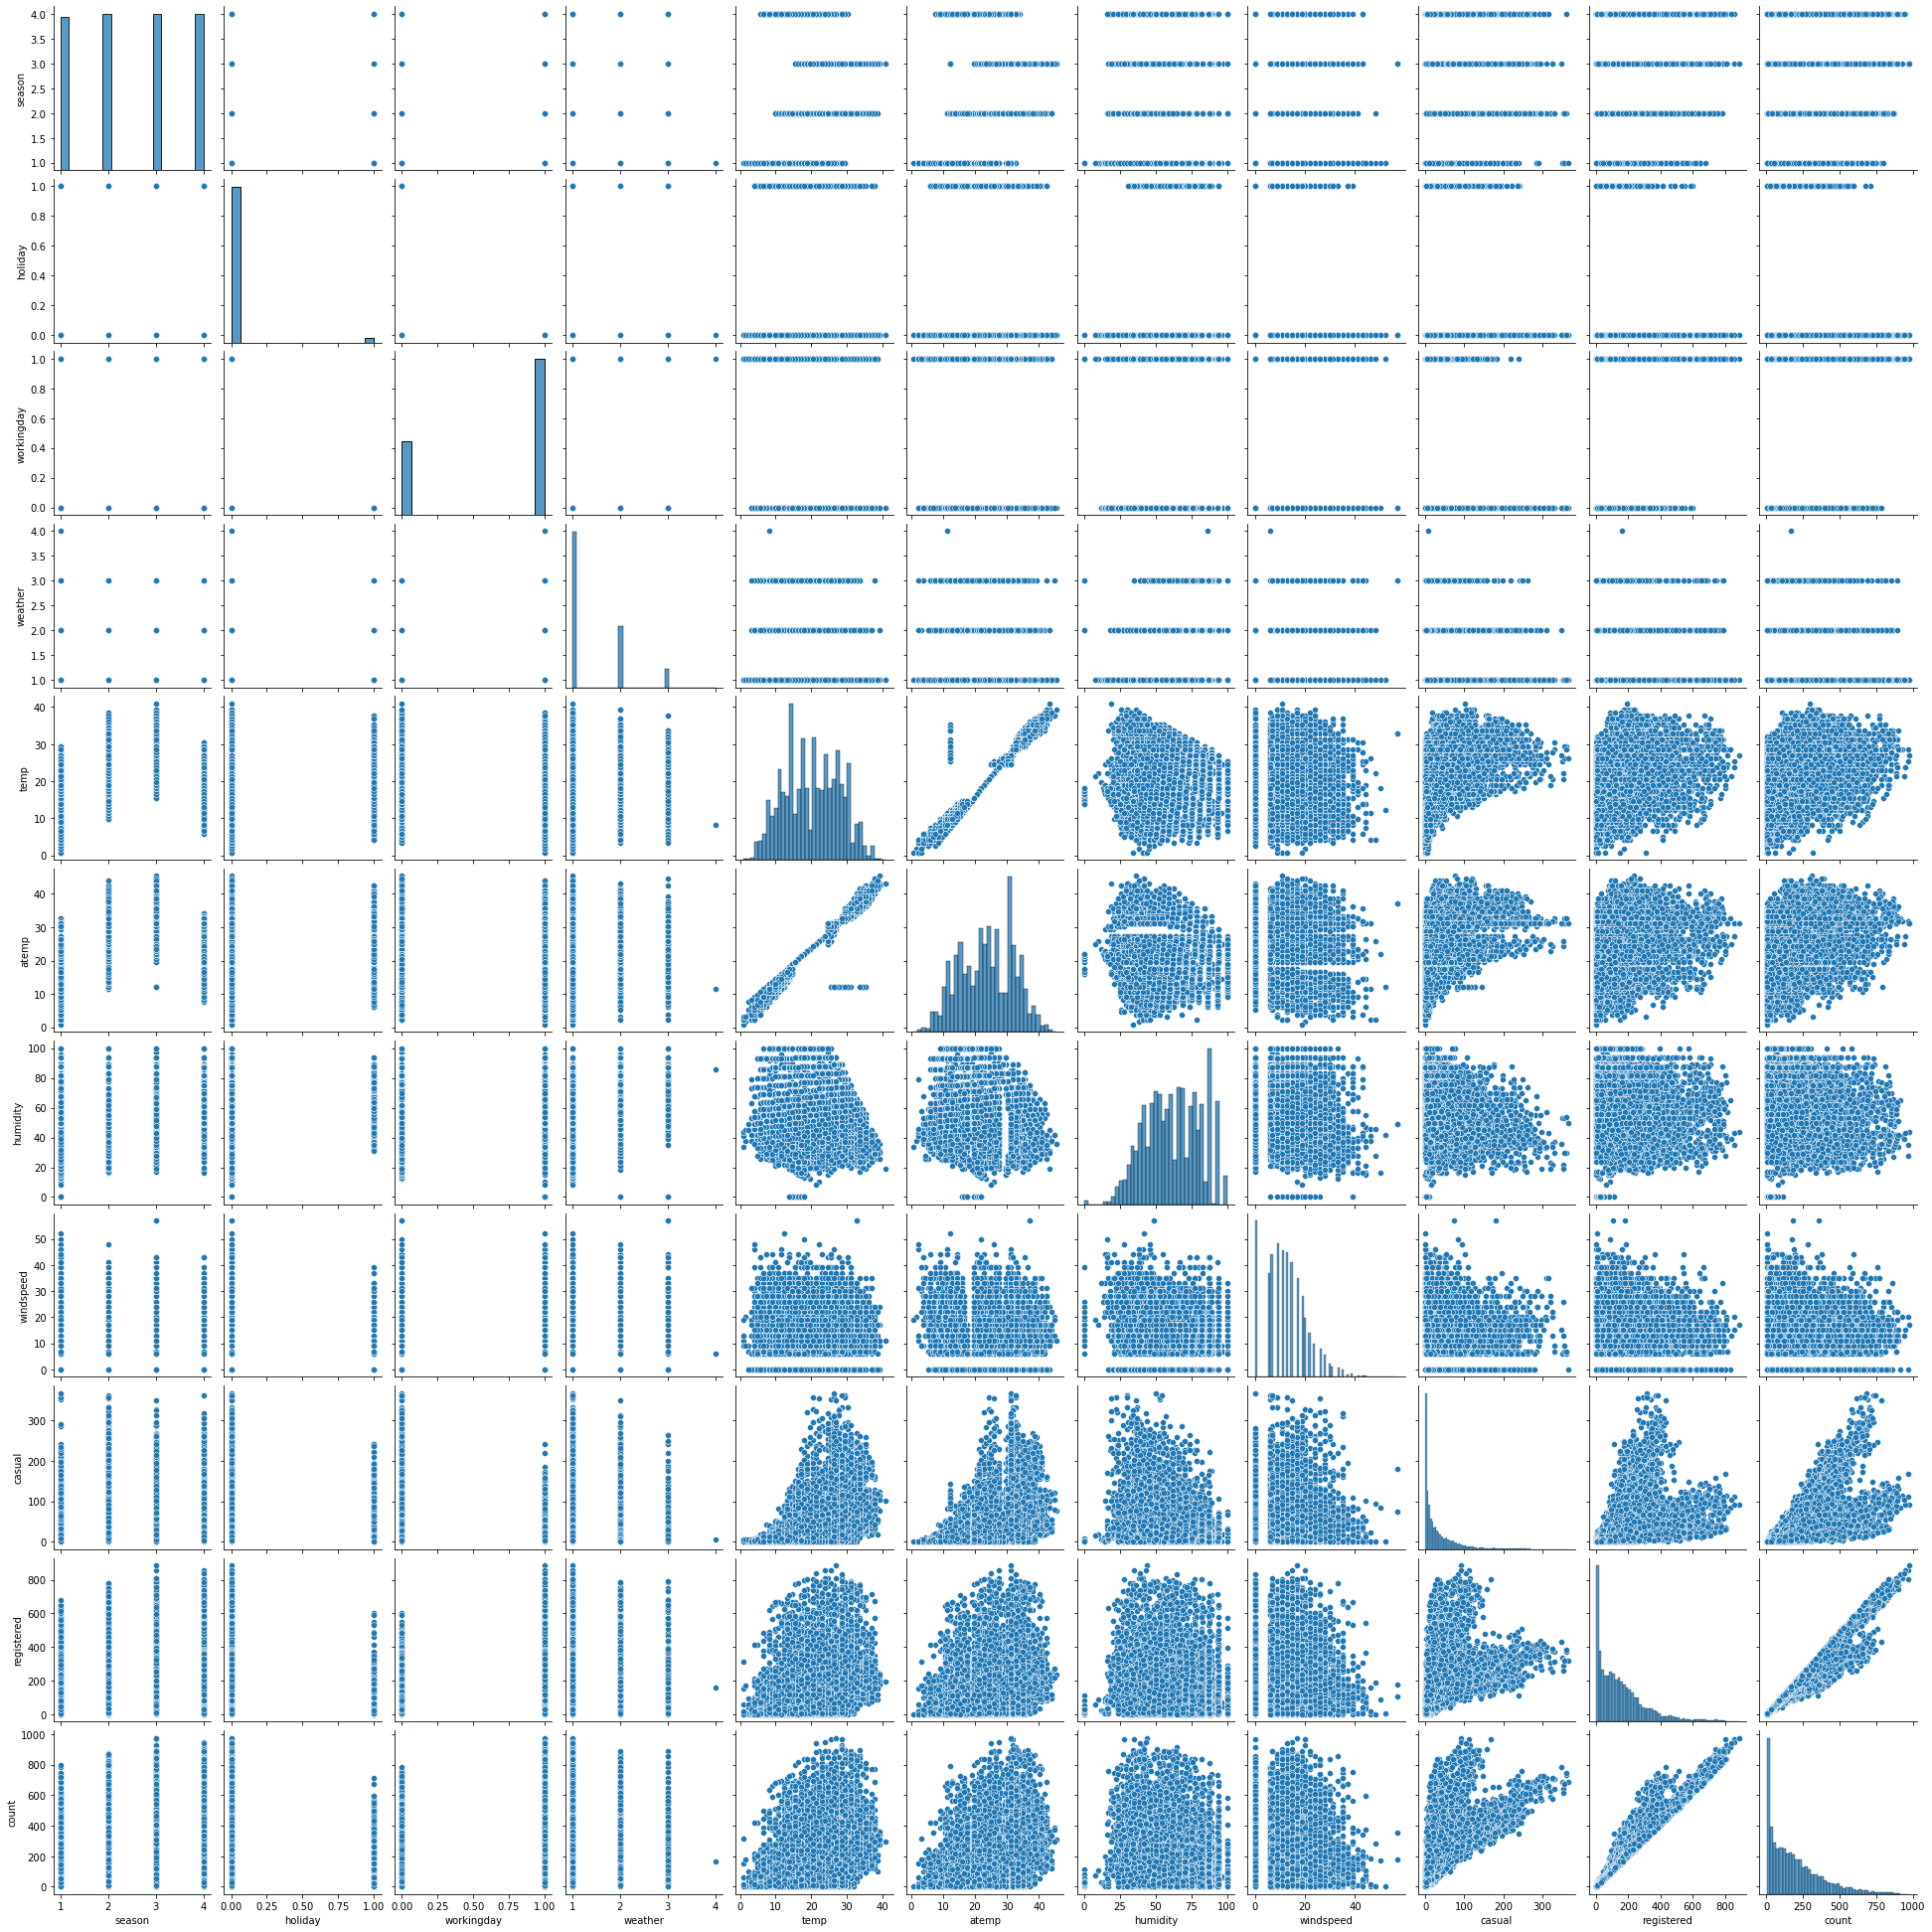

In [29]:
sns.pairplot(data=df)

In [30]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [31]:
mean_absolute_percentage_error(actual_count,model_pred_count)

479.0514837962857

In [33]:

df.groupby("weather").registered.agg(["mean","median","count"])

,mean,median,count
weather,,,
1,165.287904,131,7176
2,148.426299,112,2829
3,101.403958,64,859
4,158.000000,158,1


In [35]:

df.groupby("weather").registered.agg(["mean","median","count"])

,mean,median,count
weather,,,
1,165.287904,131,7176
2,148.426299,112,2829
3,101.403958,64,859
4,158.000000,158,1
